# Project Name : Laptop Specification Analysis
Introduction This project focuses on analyzing a dataset of laptops, which includes detailed specifications such as brand, model, screen size, RAM, storage type, CPU, GPU, operating system, weight, and price. With laptops being an integral part of modern life, this dataset provides valuable insights into the trends, features, and pricing strategies in the laptop market.

The dataset consists of 21 columns, each capturing a unique aspect of a laptop's configuration. By exploring this data, we aim to uncover patterns and relationships between technical specifications and pricing, which can help both consumers and manufacturers make informed decisions.

# Objective
Market Insights: Analyze the popularity of brands and categories (e.g., ultrabooks, gaming laptops). Performance Analysis: Explore the relationship between CPU, RAM, and GPU with laptop pricing. Trends and Features: Investigate how features like screen size, touchscreen functionality, and weight influence consumer choices. Visualization: Create compelling visualizations to present key findings.

# Import Required Libraries

In [174]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [175]:
# reading a data
df=pd.read_csv('laptop data.csv')

In [176]:
df.head(11)

,Company,Product,TypeName,Inches,Ram,OS,Weight,price,ScreenW,ScreenH,...,Unnamed: 12,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
0,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,"1,340",2560,1600,...,NaN,Intel,2.3,Core i5,128,0,SSD,No,Intel,Iris Plus Graphics 640
1,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,899,1440,900,...,NaN,Intel,1.8,Core i5,128,0,Flash Storage,No,Intel,HD Graphics 6000
2,HP,250 G6,Notebook,15.6,8,No OS,1.86,575,1920,1080,...,NaN,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
3,Apple,MacBook Pro,Ultrabook,15.4,16,macOS,1.83,"2,537",2880,1800,...,NaN,Intel,2.7,Core i7,512,0,SSD,No,AMD,Radeon Pro 455
4,Apple,MacBook Pro,Ultrabook,13.3,8,macOS,1.37,"1,804",2560,1600,...,NaN,Intel,3.1,Core i5,256,0,SSD,No,Intel,Iris Plus Graphics 650
5,Acer,Aspire 3,Notebook,15.6,4,Windows 10,2.10,400,1366,768,...,NaN,AMD,3.0,A9-Series 9420,500,0,HDD,No,AMD,Radeon R5
6,Apple,MacBook Pro,Ultrabook,15.4,16,Mac OS X,2.04,"2,140",2880,1800,...,NaN,Intel,2.2,Core i7,256,0,Flash Storage,No,Intel,Iris Pro Graphics
7,Apple,Macbook Air,Ultrabook,13.3,8,macOS,1.34,"1,159",1440,900,...,NaN,Intel,1.8,Core i5,256,0,Flash Storage,No,Intel,HD Graphics 6000
8,Asus,ZenBook UX430UN,Ultrabook,14.0,16,Windows 10,1.30,"1,495",1920,1080,...,NaN,Intel,1.8,Core i7 8550U,512,0,SSD,No,Nvidia,GeForce MX150
9,Acer,Swift 3,Ultrabook,14.0,8,Windows 10,1.60,770,1920,1080,...,NaN,Intel,1.6,Core i5 8250U,256,0,SSD,No,Intel,UHD Graphics 620


# Quick View of the Last Few Rows

In [178]:
df.tail()

,Company,Product,TypeName,Inches,Ram,OS,Weight,price,ScreenW,ScreenH,...,Unnamed: 12,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
194,Dell,Inspiron 5379,2 in 1 Convertible,13.3,8,Windows 10,1.62,839,1920,1080,...,NaN,Intel,1.8,Core i7 8550U,1024,0,HDD,No,Intel,UHD Graphics 620
195,HP,ProBook 470,Notebook,17.3,8,Windows 10,2.50,914,1920,1080,...,NaN,Intel,1.6,Core i5 8250U,1024,0,HDD,No,Nvidia,GeForce 930MX
196,Razer,Blade Pro,Gaming,17.3,32,Windows 10,3.49,"6,099",3840,2160,...,NaN,Intel,2.9,Core i7 7820HK,1024,0,SSD,No,Nvidia,GeForce GTX 1080
197,HP,ProBook 430,Notebook,13.3,8,Windows 10,1.49,959,1920,1080,...,NaN,Intel,1.6,Core i5 8250U,512,0,SSD,No,Intel,UHD Graphics 620
198,HP,Omen 17-W295,Gaming,17.3,16,Windows 10,3.35,"1,379",1920,1080,...,NaN,Intel,2.8,Core i7 7700HQ,256,1024,SSD,HDD,Nvidia,GeForce GTX 1050


# Randomly selects 5 rows from the dataset.¶

In [180]:
df.sample(5)

,Company,Product,TypeName,Inches,Ram,OS,Weight,price,ScreenW,ScreenH,...,Unnamed: 12,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
29,HP,ProBook 470,Notebook,17.3,8,Windows 10,2.50,896,1920,1080,...,NaN,Intel,1.6,Core i5 8250U,1024,0,HDD,No,Nvidia,GeForce 930MX
112,Lenovo,ThinkPad Yoga,2 in 1 Convertible,13.3,8,Windows 10,1.37,"1,399",1920,1080,...,NaN,Intel,2.5,Core i5 7200U,256,0,SSD,No,Intel,HD Graphics 620
186,Dell,XPS 15,Notebook,15.6,16,Windows 10,2.06,"2,397",3840,2160,...,NaN,Intel,2.8,Core i7 7700HQ,512,0,SSD,No,Nvidia,GeForce GTX 1050
173,Toshiba,Satellite Pro,Notebook,15.6,4,Windows 10,2.00,489,1366,768,...,NaN,Intel,2.4,Core i3 7100U,500,0,HDD,No,Intel,HD Graphics 620
100,HP,15-bs017nv (i7-7500U/8GB/256GB/Radeon,Notebook,15.6,8,Windows 10,1.91,719,1920,1080,...,NaN,Intel,2.7,Core i7 7500U,256,0,SSD,No,AMD,Radeon 530


# Check the records of rows and columns


In [182]:
df.shape

(199, 22)

# Checking the null values from dataset

In [184]:
## checking null values
df.isnull().sum()

Company                   0
Product                   0
TypeName                  0
Inches                    0
Ram                       0
OS                        0
Weight                    0
price                     0
ScreenW                   0
ScreenH                   0
Touchscreen               0
IPSpanel                  0
Unnamed: 12             199
CPU_company               0
CPU_freq                  0
CPU_model                 0
PrimaryStorage            0
SecondaryStorage          0
PrimaryStorageType        0
SecondaryStorageType      0
GPU_company               0
GPU_model                 0
dtype: int64

# Drops a specific column from data which is irrelevant, mislabeled, or unnecessary

In [186]:
data = df.drop(columns=['Unnamed: 12'], axis=1)

# information about data

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               199 non-null    object 
 1   Product               199 non-null    object 
 2   TypeName              199 non-null    object 
 3   Inches                199 non-null    float64
 4   Ram                   199 non-null    int64  
 5   OS                    199 non-null    object 
 6   Weight                199 non-null    float64
 7   price                 199 non-null    object 
 8   ScreenW               199 non-null    int64  
 9   ScreenH               199 non-null    int64  
 10  Touchscreen           199 non-null    object 
 11  IPSpanel              199 non-null    object 
 12  Unnamed: 12           0 non-null      float64
 13  CPU_company           199 non-null    object 
 14  CPU_freq              199 non-null    float64
 15  CPU_model             1

# Clean Data for Analysis:

Removing commas ensures the 'price' column can be treated as a numeric column.
Enable Numeric Calculations:

Converting the 'price' column to numeric allows operations like:
Summing up prices.
Calculating averages.
Sorting or filtering laptops based on price.
Check Data Types:

data.dtypes ensures all columns are in the correct format for further analysis or visualization.

In [190]:
df['price'] = df['price'].str.replace(',', '', regex=True)
df['price'] = pd.to_numeric(df['price'], errors='coerce')

print(data)
print(data.dtypes)

    Company        Product            TypeName  Inches  Ram          OS  \
0     Apple    MacBook Pro           Ultrabook    13.3    8       macOS   
1     Apple    Macbook Air           Ultrabook    13.3    8       macOS   
2        HP         250 G6            Notebook    15.6    8       No OS   
3     Apple    MacBook Pro           Ultrabook    15.4   16       macOS   
4     Apple    MacBook Pro           Ultrabook    13.3    8       macOS   
..      ...            ...                 ...     ...  ...         ...   
194    Dell  Inspiron 5379  2 in 1 Convertible    13.3    8  Windows 10   
195      HP    ProBook 470            Notebook    17.3    8  Windows 10   
196   Razer      Blade Pro              Gaming    17.3   32  Windows 10   
197      HP    ProBook 430            Notebook    13.3    8  Windows 10   
198      HP   Omen 17-W295              Gaming    17.3   16  Windows 10   

     Weight  price  ScreenW  ScreenH  ... IPSpanel CPU_company CPU_freq  \
0      1.37  1,340     2

In [191]:
df['price'] = df['price'].astype(float)

# checking is their any duplicate values in data


In [193]:
df.duplicated().sum()

0

# Lists all the column names in the DataFrame.


In [195]:
list(df.columns)

['Company',
 'Product',
 'TypeName',
 'Inches',
 'Ram',
 'OS',
 'Weight',
 'price',
 'ScreenW',
 'ScreenH',
 'Touchscreen',
 'IPSpanel',
 'Unnamed: 12',
 'CPU_company',
 'CPU_freq',
 'CPU_model',
 'PrimaryStorage',
 'SecondaryStorage',
 'PrimaryStorageType',
 'SecondaryStorageType',
 'GPU_company',
 'GPU_model']

# 1.identify the most common weight range and understand the spread of laptop weights?

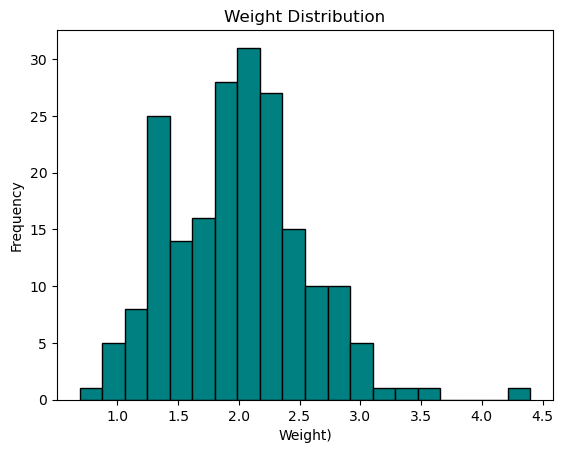

In [197]:
plt.hist(df['Weight'], bins=20,color='teal',edgecolor='black')
plt.title('Weight Distribution')
plt.xlabel('Weight)')
plt.ylabel('Frequency')
plt.show()

# Most Common Weight Range:
The highest frequency occurs in the weight range of 2.0–2.5 kg, indicating that this is the most typical laptop weight.

Spread of Weights: Most laptops weigh between 1.0–3.0 kg, while laptops weighing more than 3.5 kg or less than 1.0 kg are outliers.

Symmetry in Distribution: The bell-shaped curve suggests a near-normal distribution, with a central peak around the average weight.

# 2.How many laptops in the dataset are equipped with a touchscreen?


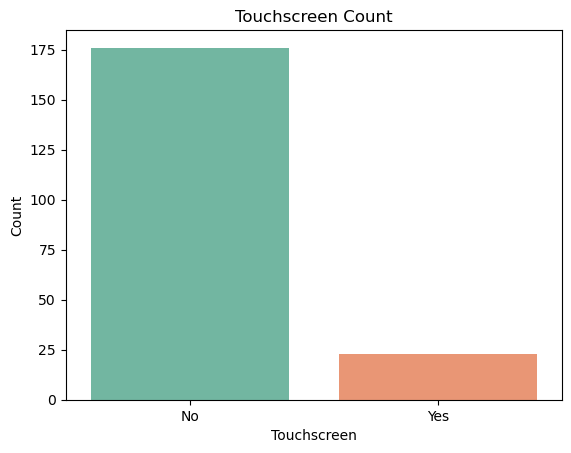

In [200]:
sns.countplot(x='Touchscreen', data=df,palette='Set2')
plt.title('Touchscreen Count')
plt.xlabel('Touchscreen')
plt.ylabel('Count')
plt.show()

# Touchscreen vs Non-Touchscreen:
The majority of laptops in the dataset do not have a touchscreen, as indicated by the significantly taller bar labeled "No." Laptops with a touchscreen ("Yes") are far fewer in comparison. Count Insights:

Roughly 175–180 laptops lack a touchscreen. Only about 25–30 laptops are equipped with a touchscreen.

# 3.What is the distribution of different types of laptops in the dataset

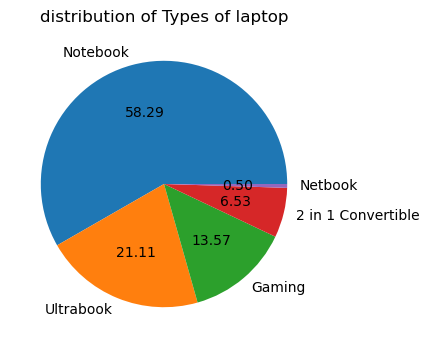

In [203]:
plt.figure(figsize=[8,4])
df['TypeName'].value_counts().plot.pie(autopct='%2.2f')
plt.title('distribution of Types of laptop')
plt.ylabel('')
plt.show()

# Dominant Laptop Type:
Notebooks are the most common type of laptops in the dataset, making up 58.29% of the total. This suggests that standard notebooks dominate the market, likely due to their versatility and affordability. Other Significant Types:

Ultrabooks are the second most common type, accounting for 21.11%, reflecting a demand for lightweight, high-performance laptops. Gaming laptops make up 13.57%, indicating a niche but significant user base.

# 4.What relationships can we observe between Ram, Weight, Inches, and Price in the dataset, based on the pair plot?

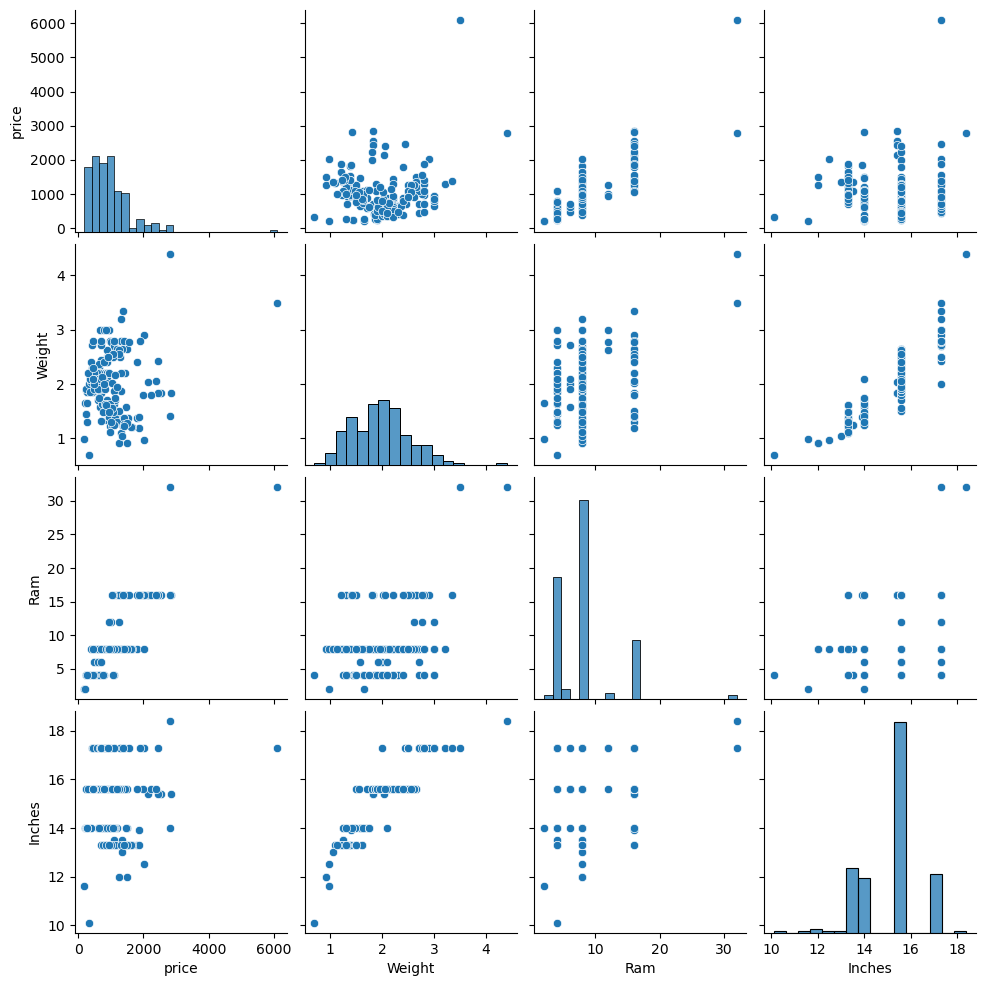

In [206]:
sns.pairplot(df[['price','Weight','Ram', 'Inches']])
plt.show()

# The pair plot visualizes the relationships and distributions of the numerical features Ram, Weight, Inches, and Price. Here's a breakdown:
Diagonal Plots:

The diagonal contains histograms that show the distributions of each variable. Ram and Inches are discrete variables with distinct values, while Weight appears to follow a bell-shaped distribution. Scatter Plot Observations:

Price vs. Ram: There is a positive correlation between Price and Ram, indicating that laptops with higher RAM tend to be more expensive. Price vs. Inches: No strong correlation is visible, but larger screen sizes (Inches) tend to have slightly higher prices. Price vs. Weight: A weak positive correlation is observed. Heavier laptops are slightly more expensive, potentially due to components like GPUs. Other Relationships:

Ram vs. Weight: Laptops with higher RAM are generally heavier, likely because they are performance-focused laptops like gaming laptops. Inches vs. Weight: There is a positive relationship; larger screen sizes (Inches) are typically associated with heavier laptops. Insight:

This plot helps identify trends and correlations. For example, manufacturers might focus on balancing performance (RAM) with weight for better customer appeal. For users, it reveals that price is strongly influenced by Ram and slightly by Weight

# 5.show different laptop companies distribute their storage types (Primary and Secondary), and which company provides the most storage options?


<Figure size 800x500 with 0 Axes>

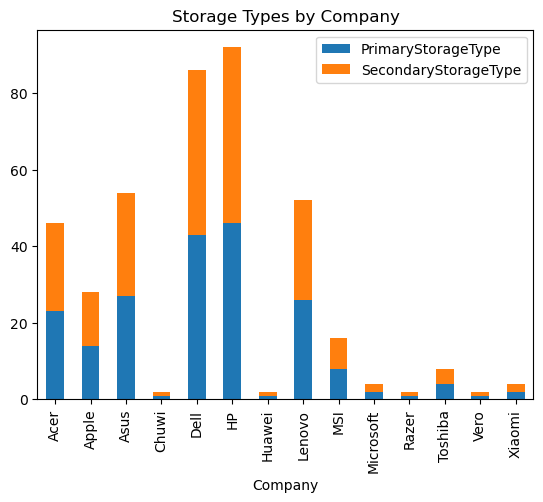

In [209]:
plt.figure(figsize=(8,5))
storage_types = df.groupby('Company')[['PrimaryStorageType', 'SecondaryStorageType']].count()
storage_types.plot(kind='bar', stacked=True)
plt.title('Storage Types by Company')
plt.show()

# The stacked bar chart shows the count of PrimaryStorageType and SecondaryStorageType across various laptop companies. Here are the key insights:
Most Storage Options:

Dell leads with the highest number of storage options, offering a combination of primary and secondary storage types. This indicates that Dell provides a wide range of configurations. Other Companies with Significant Storage Counts:

HP, Lenovo, and Asus also have considerable counts, suggesting that they cater to diverse customer needs with multiple storage configurations. Companies Focused on Primary Storage Only:

Apple primarily provides laptops with only primary storage and minimal or no secondary storage options, reflecting their streamlined approach to hardware design. Smaller Players:

Brands like Razer, Xiaomi, and Toshiba have relatively fewer storage options, indicating limited product variety or market presence. Comparison Between Storage Types:

For most companies, primary storage (blue bars) dominates over secondary storage (orange bars), suggesting that laptops are increasingly designed with single, high-capacity storage drives.



# 6.Which company has the highest number of laptops in the dataset?

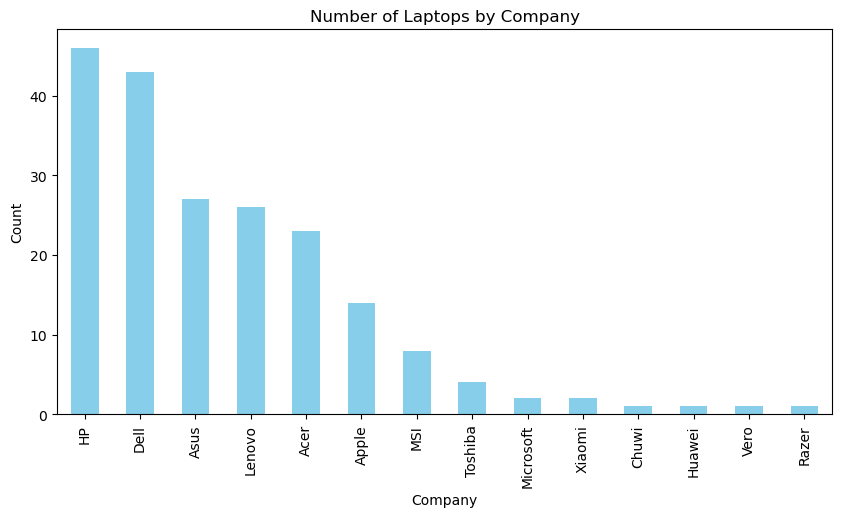

In [212]:
plt.figure(figsize=(10,5))
df['Company'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Laptops by Company')
plt.xlabel('Company')
plt.ylabel('Count')
plt.show()

# The bar chart displays the count of laptops available from each company in the dataset. Here are the key takeaways:
Top Laptop Manufacturer:

HP leads with the highest number of laptops in the dataset, exceeding 40 models. This indicates that HP has a wide range of offerings, likely targeting various customer needs. Other Leading Companies:

Dell and Asus follow HP, both with significant counts. Dell has just under 40 models, while Asus has slightly fewer, showing they also cater to diverse market demands. Lenovo and Acer are also notable contributors, each with around 20 models. Mid-Tier Manufacturers:

Companies like Apple, MSI, and Toshiba have fewer offerings, ranging between 10 and 20 laptops. These brands may focus on specific market segments rather than a broad product portfolio. Small Contributors:

Brands such as Microsoft, Xiaomi, Chuwi, Huawei, Vero, and Razer have minimal representation in the dataset, with fewer than five models each.

# 7.Which product type has the highest average weight, and what is its approximate value?


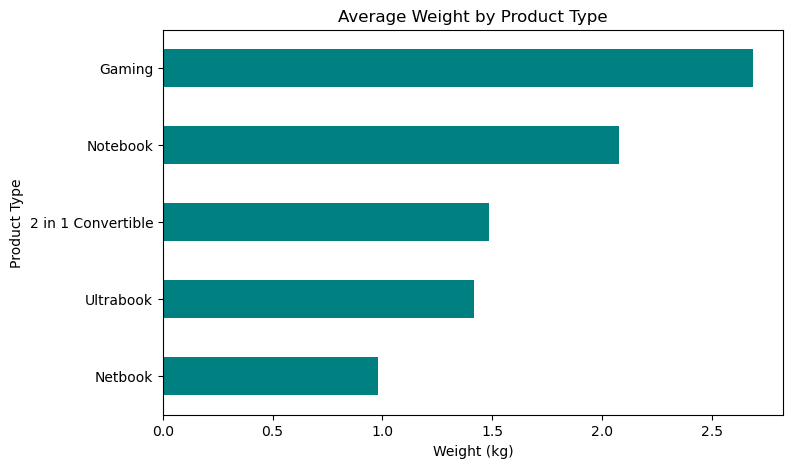

In [215]:
plt.figure(figsize=(8,5))
df.groupby('TypeName')['Weight'].mean().sort_values().plot(kind='barh', color='teal')
plt.title('Average Weight by Product Type')
plt.xlabel('Weight (kg)')
plt.ylabel('Product Type')
plt.show()


# The product type with the highest average weight is Gaming, with an approximate value of 2.5 kg.
Comparing average weights by product type is essential in understanding the design and portability characteristics of different devices. For example, gaming laptops typically prioritize high-performance components, which may result in heavier devices. On the other hand, product types like Ultrabooks or Netbooks are designed for portability and are generally lighter. This insight can help manufacturers, marketers, or consumers make informed decisions based on the use case and product category.

# 8.Which type of laptop has the highest count, and what does this indicate?


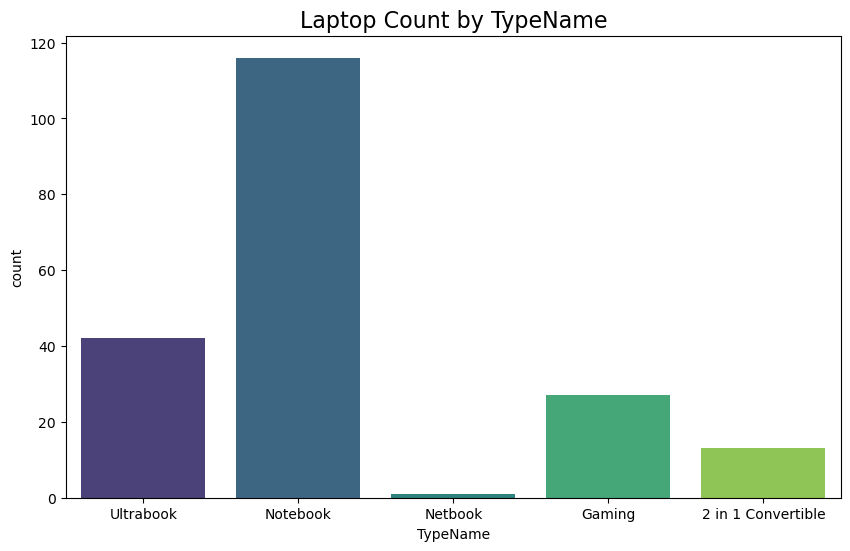

In [218]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='TypeName', palette='viridis')
plt.title('Laptop Count by TypeName', fontsize=16)
plt.show()

# Highest Count:
The Notebook type has the highest count, exceeding 120 units. This indicates that notebooks are the most common type of laptop in the dataset, likely due to their general-purpose nature and popularity across various user groups. Reason for Count Differences:

The significant difference between types like Notebook and Netbook could stem from market demand and usage scenarios. Notebooks are versatile and cater to a broad audience, making them more prevalent. In contrast, Netbooks are less common, possibly due to limited capabilities and declining popularity as more powerful lightweight laptops, like Ultrabooks, became available.

# 9.What percentage of CPUs in the dataset are manufactured by Intel and AMD?


Text(0.5, 1.0, 'cpu distribution')

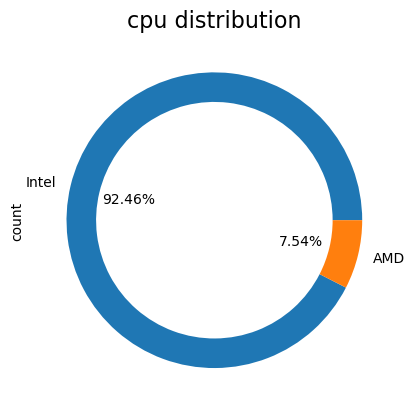

In [221]:
df['CPU_company'].value_counts().plot.pie(autopct='%1.2f%%',wedgeprops={'width': 0.2})
plt.title('cpu distribution', fontsize=16)

# What it shows:
This pie chart displays the distribution of CPU companies (Intel and AMD) in the dataset, with Intel dominating at 92.46% and AMD having only 7.54%. Insights:

Intel's significant share indicates its established dominance in the market, possibly due to long-standing partnerships with laptop manufacturers and widespread consumer trust. AMD, while smaller, represents an alternative choice, likely for users seeking better value or performance in specific scenarios. This can help identify trends in CPU selection and potential areas for AMD to expand its market share.

# 10.Identify the company with the highest count and explain its significance.

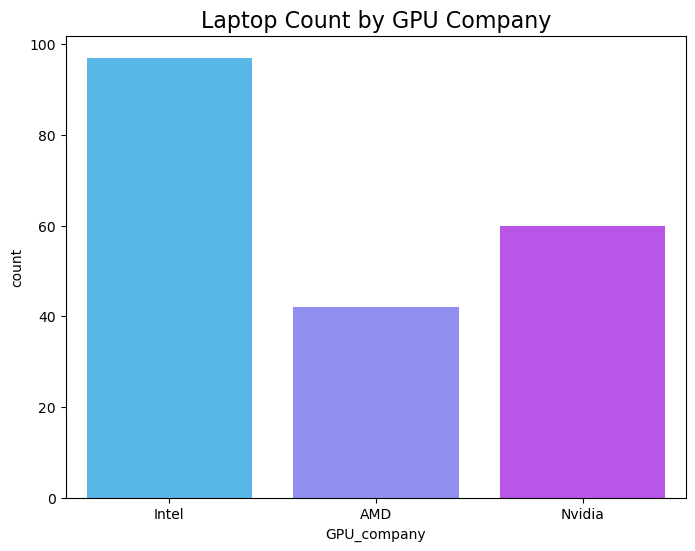

In [224]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='GPU_company', palette='cool')
plt.title('Laptop Count by GPU Company', fontsize=16)
plt.show()

# This bar chart visualizes the number of laptops categorized by GPU company (Intel, AMD, and Nvidia). The chart shows:
Intel has the highest count among the three, indicating that laptops equipped with Intel GPUs dominate this dataset. Nvidia comes in second, followed by AMD with the lowest count. Significance: Intel's dominance may reflect its prevalence in integrated GPUs, commonly found in laptops targeting general-purpose users or the mid-range market. Nvidia's strong presence aligns with its reputation for high-performance GPUs, often used in gaming or professional-grade laptops. AMD's comparatively lower count could suggest fewer laptops in the dataset leverage AMD GPUs or may indicate limited adoption within this sample.

11.show the primary storage by CPU_freq

# 11.show the primary storage by CPU_freq

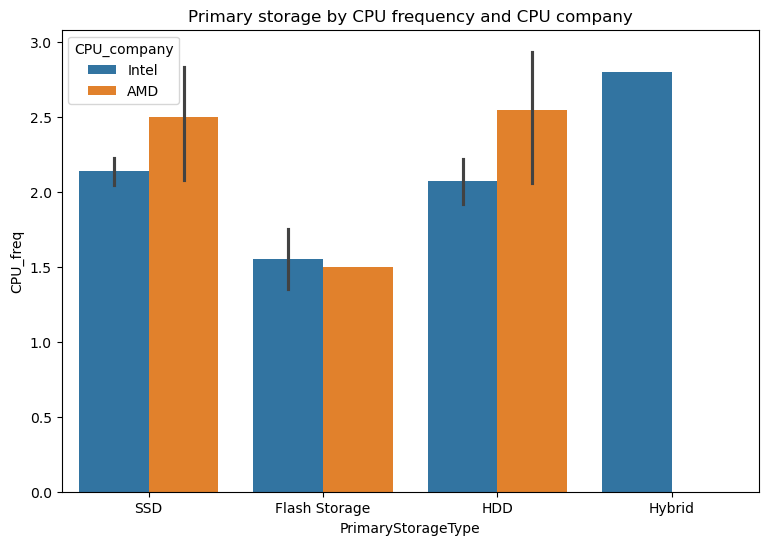

In [227]:
plt.figure(figsize=(9,6))
sns.barplot(data=df,x=df['PrimaryStorageType'],y=df['CPU_freq'],hue='CPU_company')
plt.title('Primary storage by CPU frequency and CPU company')
plt.show()

# The chart type is a bar plot, which is used to compare CPU frequencies for two CPU companies (Intel and AMD) across four different storage types.
The legend distinguishes between Intel (blue bars) and AMD (red bars).

From the bars:

AMD CPUs perform better with SSD and HDD in terms of CPU frequency.

Intel CPUs perform slightly better for the Hybrid storage type.

Flash Storage has the lowest average CPU frequency for both CPU companies.

AMD generally has higher CPU frequencies across most storage types except Hybrid.

Hybrid storage systems have the highest CPU frequencies for both CPU companies, indicating they might be used in high-performance setups.

Flash Storage systems have the lowest CPU frequencies, possibly due to their association with lower-cost or lightweight systems.

# Conclusion:
The analysis of the laptop dataset provided valuable insights into the trends and factors influencing laptop specifications and pricing. Here are the key findings:

Company Trends:

Different companies cater to distinct market segments, with brands like Apple focusing on premium, high-performance laptops, while Lenovo and HP target budget-conscious consumers. Price Drivers:

Features such as higher RAM, CPU frequency, Primary Storage (SSD), and IPS Panels significantly impact laptop pricing. Laptops with Touchscreen and lightweight designs are priced higher, appealing to users who prioritize portability and modern features. Screen and Display:

Larger screen sizes (measured in Inches, ScreenW, and ScreenH) generally correlate with higher prices, but they also lead to heavier laptops, affecting portability. Performance:

Devices with SSD storage and dedicated GPUs (from leading companies like NVIDIA or AMD) offer superior performance, making them ideal for gamers and professionals. Laptops with Intel and AMD processors dominate the market, with clock speeds (CPU frequency) being a critical factor for performance. Operating Systems:

The majority of laptops run Windows OS, offering flexibility in features and price. Apple’s macOS devices cater to premium users, and laptops with Linux OS target niche markets. Weight Considerations:

Lightweight laptops are more expensive but offer better portability, suiting users who need mobile workstations.

# Final Thoughts:
This project demonstrated how laptop specifications influence pricing and user preferences. Buyers should carefully evaluate their priorities, such as performance, portability, or budget, to make informed decisions.

For future analysis, integrating user reviews and market demand data can provide deeper insights into consumer satisfaction and emerging trends in the laptop industry.`